
# Project: Investigate a Dataset (TMDb movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> My name is Abdullah Alsuwailem.<br> First of all, This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
In this project I will analyze the data by cleaning them and asking some questions, which I will try to answer them.<br><br>
Questions we can analyze in this dataset:<br>
1- Does movies increase every year or decrease?<br>
2- What happens to the popularity of the movies every year?<br>
3- What is the minimum runtime of all the movies?<br>
4- Which genre has the highest movies?<br>
5- Which movie has the highest profit?<br><br>
Let's get started!


In [111]:
# import statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load the data, check for its columns, and then try to understand it for the cleaning process.

### General Properties

In [112]:
# Load the data
mov = pd.read_csv('tmdb-movies.csv')
mov.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [113]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>Now, after I loaded the dataset and checked its columns I understand what this data focuses on.<br>
And as I noticed, The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars.<br>
I'm going to ignore them and keep revenue and budget in the cleaning process

### Data Cleaning (Remove duplicates, unnecessary and unused columns)

In [114]:
# Check before deleting the duplicates
mov.shape

(10866, 21)

In [115]:
mov = mov.drop_duplicates()
mov.shape

(10865, 21)

In [116]:
# So we only had 1 duplicate and now its deleted
# Let's check for nulls!
mov.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [117]:
# Get rid of unnecessary columns
mov = mov.drop(['imdb_id','homepage','budget_adj','revenue_adj','tagline','overview','release_date','keywords',
               'production_companies','vote_count','vote_average'], axis = 1)
# Remove null rows
mov = mov.dropna()
mov.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_year      0
dtype: int64

In [118]:
# Check after dropping every null row
mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   release_year    10731 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 922.2+ KB


In [119]:
# Now,the dataset has been reduced to 10731

# Every value contains zero in budget, revenue and runtime should change to NaN
def replace_to_nan (var):
    mov[var].replace(0,np.nan, inplace = True, regex = True)
replace_to_nan('budget')
replace_to_nan('revenue')
replace_to_nan('runtime')
mov.isnull().sum()

id                   0
popularity           0
budget            5578
revenue           5888
original_title       0
cast                 0
director             0
runtime             28
genres               0
release_year         0
dtype: int64

In [120]:
# Since we changed them to NaN, we have to drop runtime NaNs
# However, before that we won't delete budge and revenue because they contain more than 5000 (almost half the data)
def replace_to_zero(var):
    mov[var].replace(np.nan,0, inplace = True, regex = True)
replace_to_zero('budget')
replace_to_zero('revenue')
# budget and revenue returned to their original state
mov = mov.dropna()
# runtime nulls dropped
mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10703 non-null  int64  
 1   popularity      10703 non-null  float64
 2   budget          10703 non-null  float64
 3   revenue         10703 non-null  float64
 4   original_title  10703 non-null  object 
 5   cast            10703 non-null  object 
 6   director        10703 non-null  object 
 7   runtime         10703 non-null  float64
 8   genres          10703 non-null  object 
 9   release_year    10703 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 919.8+ KB


### Looks like the data has been cleaned and reduced to 10703 <br>I didn't delete the columns that contains zero in budget and revenue, because I don't want half the data to be deleted

<a id='eda'></a>
## Exploratory Data Analysis

> Now, I will explore the data to answer some questions that I asked in the introduction, then I'm going to plot various visualizations.


### Research Question 1 (Does movies increase every year or decrease ?)

In [121]:
comparison = mov["release_year"].value_counts().to_frame().style.bar()
comparison

,release_year
2014,680
2013,644
2015,610
2012,572
2011,529
2009,524
2008,485
2010,475
2007,432
2006,403


##### As we can see, movies are increasing every year

### Research Question 2  (What happens to the popularity of the movies every year ?)

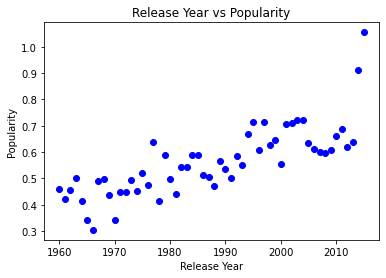

In [122]:
movies_per_year = mov.groupby('release_year').mean().index
popular = mov.groupby('release_year').mean()['popularity']
plt.scatter(movies_per_year,popular, color = 'blue')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.title('Release Year vs Popularity')
plt.show()

> We see the popularity of the movies increases every year

### Research Question 3 (What is the minimum runtime of all the movies?)

In [123]:
min_runtime = mov['runtime'].min()
print("the minimum is:", min_runtime)

the minimum is: 3.0


(0.0, 2750.0)

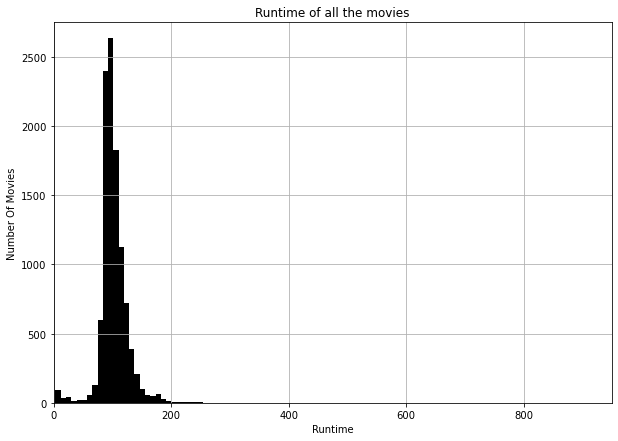

In [124]:
# Let's draw it
plt.xlabel('Runtime') # x label name
plt.ylabel('Number Of Movies') # y label name

plt.title('Runtime of all the movies') # Title name

# plotting the relationship between runtime and number of movies

mov['runtime'].hist(bins=100, color = 'black', figsize=(10,7))
plt.xlim(0,950)
plt.ylim(0,2750)

C:\Users\ksax6\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


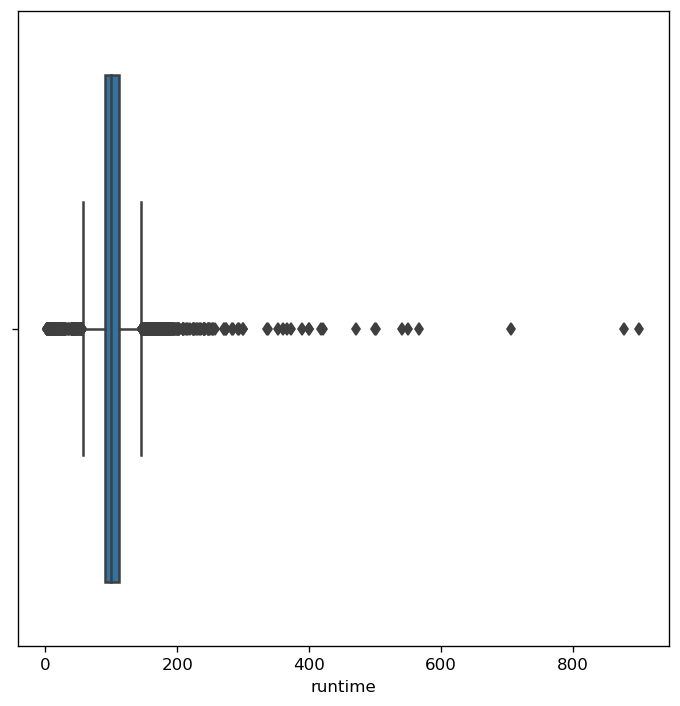

In [125]:
# plotting a boxplot
plt.figure(figsize=(7,7), dpi = 120)
sns.boxplot(mov['runtime'])
plt.show()

> As it shown, I successfully managed to calculate minimum runtime and draw the histogram which contains all movies runtime

### Research Question 4: (Which genre has the highest movies?)


> We are going to gather all the genres by using str.cat(sep = '|') and after that split them to count every genre

In [126]:
count = pd.Series(mov['genres'].str.cat(sep = '|').split('|')).value_counts()
# I needed to go to pandas documentation to know how to apply the 'count' variable to count every genre
# So I gathered all the genres by concatenate them into a single string seperated by '|' then I split them using '|'
# After that I used .value_counts() to count every genre movies.
count

Drama              4738
Comedy             3765
Thriller           2900
Action             2374
Romance            1703
Horror             1628
Adventure          1464
Crime              1352
Science Fiction    1220
Family             1212
Fantasy             907
Mystery             806
Animation           664
Documentary         467
Music               394
History             330
War                 268
Foreign             183
Western             164
TV Movie            159
dtype: int64

<AxesSubplot:ylabel='None'>

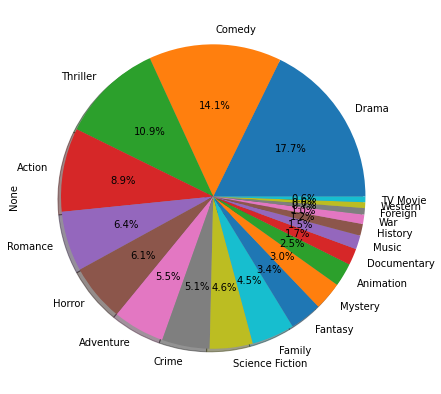

In [127]:
count.plot.pie(y='genres', figsize=(7, 7), autopct='%1.1f%%', shadow=True)

> As we can see, Drama has the highest movies in the dataset




### Research Question 5: (Which movie has the highest profit?)

In [128]:
# Adding profit column
mov.insert(4,'profit',mov['revenue']-mov['budget'])
mov.head()

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,release_year
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015
2,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015
4,168259,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015


In [129]:
mov.loc[mov['profit'].idxmax()] # to find the highest profit movie

id                                                            19995
popularity                                                 9.432768
budget                                                  237000000.0
revenue                                                2781505847.0
profit                                                 2544505847.0
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
runtime                                                       162.0
genres                     Action|Adventure|Fantasy|Science Fiction
release_year                                                   2009
Name: 1386, dtype: object

> As it shown above, 'Avatar' movie has the highest profit in the dataset

<a id='conclusions'></a>
## Conclusions

> **Summary**: After I answered the questions, I noticed the benefits of data analysis, <br>Examples:<br>
1- Movies are increasing every year.<br>
2- The popularity of the movies increases every year.<br>
3- The minimum runtime of the movies is 3.00<br>
4- Drama genre has the highest movies in the dataset by 17.7% (4738 movies).<br>
5- 'Avatar' movie has the highest profit.<br>

>***Limitations***: Probably the biggest limitation I faced is the budget and revenue, the reason is because they have more than 5000 zeros which is almost half the dataset, and in my data analysis if I delete them the accuracy of my analysis will not be accurate because half the data is gone, so I ignored them.<br>
Another limitation, there wasn't any column describes the profit so I had to create one.<br>
last limitation is the genere splitting, I had to go to pandas documentation to read and understand how to split the '|' symbol
